In [109]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Comparison of Average Housing Costs to % of non-white home owners

In [39]:
# Total Average price vs. 1-(white owner occupied housing / total owner occupied housing)
relevantdata2 = pd.DataFrame()

relevantdata2["Total owner occupied average value of housing units"] = data.iloc[:,105]
relevantdata2["Total owner occupied housing units"] = data["Total owner occupied housing units (includes White, Black and other races)"]
relevantdata2["White owner occupied housing units"] = data["White owner occupied housing units head of household"]

relevantdata2["Total owner occupied average value of housing units"] = relevantdata2["Total owner occupied average value of housing units"].str.replace("$","")
relevantdata2["Total owner occupied average value of housing units"] = relevantdata2["Total owner occupied average value of housing units"].replace("0.00",np.nan)

for col in relevantdata2:
    relevantdata2[col] = relevantdata2[col].str.replace("$","")
    relevantdata2[col] = relevantdata2[col].str.replace(",","")
    relevantdata2[col] = relevantdata2[col].replace("...", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" ... ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" -   ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace("", np.nan)
    relevantdata2 = relevantdata2.dropna()
    relevantdata2[col] = relevantdata2[col].astype(str).astype(float)
    
relevantdata2["Percent of non-white owner occupied housing units"] = 1 - (relevantdata2["White owner occupied housing units"] / relevantdata2["Total owner occupied housing units"])
relevantdata2

,Total owner occupied average value of housing units,Total owner occupied housing units,White owner occupied housing units,Percent of non-white owner occupied housing units
0,32298.0,249.0,246.0,0.012048
1,29485.0,200.0,198.0,0.010000
2,37151.0,158.0,158.0,0.000000
3,44712.0,127.0,126.0,0.007874
4,33229.0,177.0,176.0,0.005650
...,...,...,...,...
1258,28269.0,27.0,27.0,0.000000
1259,22050.0,78.0,78.0,0.000000
1260,25313.0,60.0,59.0,0.016667
1261,33290.0,99.0,97.0,0.020202


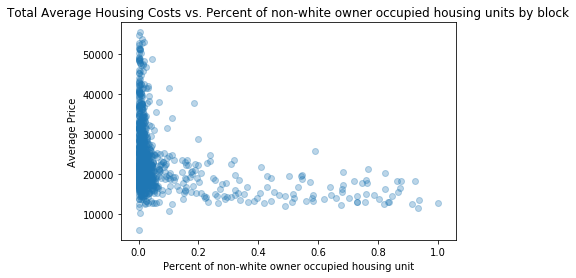

In [85]:
plt.scatter(relevantdata2["Percent of non-white owner occupied housing units"], relevantdata2["Total owner occupied average value of housing units"], alpha=0.3)
plt.title('Total Average Housing Costs vs. Percent of non-white owner occupied housing units by block')
plt.xlabel('Percent of non-white owner occupied housing unit')
plt.ylabel('Average Price')
plt.show()

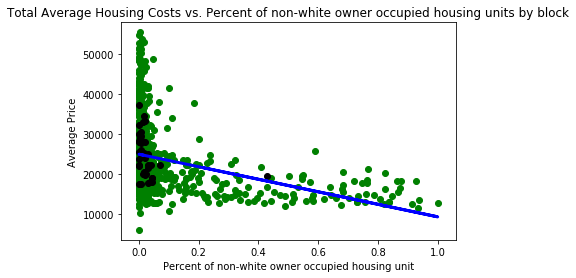

Coefficients: 
 [-15638.26424383]
Mean squared error: 25156704.91
Coefficient of determination: 0.07
Coefficient of determination: 0.10


In [86]:
non_white = pd.DataFrame()

non_white["nonwhite"] = relevantdata2["Percent of non-white owner occupied housing units"]
non_white["avcost"] = relevantdata2["Total owner occupied average value of housing units"]

non_white

#Convert to numpy array

X = non_white["nonwhite"].values
X = X.reshape(-1, 1)

Y = non_white["avcost"].values

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
Y_train = Y[:-40]
Y_test = Y[-40:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

train_pred = regr.predict(X_train)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
#changed from x_test to x_train
plt.plot(X_train, train_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.title('Total Average Housing Costs vs. Percent of non-white owner occupied housing units by block')
plt.xlabel('Percent of non-white owner occupied housing unit')
plt.ylabel('Average Price')
plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_train, train_pred))

In [100]:
#now we will test the same set again without the bottom 10%
less_10percent = relevantdata2.loc[relevantdata2["Percent of non-white owner occupied housing units"] >= 0.10]
less_10percent

,Total owner occupied average value of housing units,Total owner occupied housing units,White owner occupied housing units,Percent of non-white owner occupied housing units
30,28750.0,5.0,4.0,0.200000
115,14455.0,115.0,81.0,0.295652
116,13213.0,145.0,92.0,0.365517
150,22998.0,163.0,138.0,0.153374
151,22384.0,152.0,127.0,0.164474
...,...,...,...,...
1207,20431.0,29.0,23.0,0.206897
1209,15272.0,180.0,120.0,0.333333
1211,15570.0,170.0,93.0,0.452941
1212,14468.0,96.0,75.0,0.218750


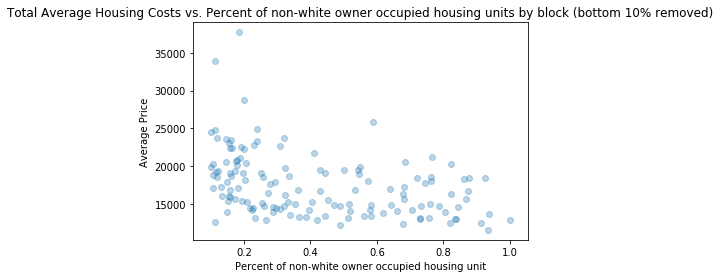

In [104]:
plt.scatter(less_10percent["Percent of non-white owner occupied housing units"], less_10percent["Total owner occupied average value of housing units"], alpha=0.3)
plt.title('Total Average Housing Costs vs. Percent of non-white owner occupied housing units by block (bottom 10% removed)')
plt.xlabel('Percent of non-white owner occupied housing unit')
plt.ylabel('Average Price')
plt.show()

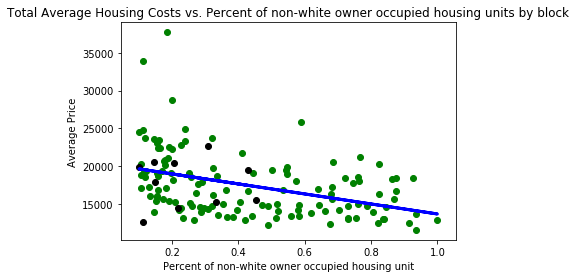

Coefficients: 
 [-6632.93459588]
Mean squared error: 10767806.86
Coefficient of determination: -0.13
Coefficient of determination: 0.17


In [106]:
non_white2 = pd.DataFrame()

non_white2["nonwhite"] = less_10percent["Percent of non-white owner occupied housing units"]
non_white2["avcost"] = less_10percent["Total owner occupied average value of housing units"]

non_white

#Convert to numpy array

X = non_white2["nonwhite"].values
X = X.reshape(-1, 1)

Y = non_white2["avcost"].values

# Split the data into training/testing sets
X_train = X[:-10]
X_test = X[-10:]

# Split the targets into training/testing sets
Y_train = Y[:-10]
Y_test = Y[-10:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

train_pred = regr.predict(X_train)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
#changed from x_test to x_train
plt.plot(X_train, train_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.title('Total Average Housing Costs vs. Percent of non-white owner occupied housing units by block')
plt.xlabel('Percent of non-white owner occupied housing unit')
plt.ylabel('Average Price')
plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_train, train_pred))